In [196]:
from skimage import feature
import numpy as np
class LocalBinaryPatterns:
    def __init__(self, radius):
        # store the number of points and radius
        self.numPoints = 8 * radius
        self.radius = radius
    def describe(self, image, eps=1e-7):
        # compute the Local Binary Pattern representation
        # of the image, and then use the LBP representation
        # to build the histogram of patterns
        lbp = feature.local_binary_pattern(image, self.numPoints,
            self.radius, method="uniform")
        (hist, _) = np.histogram(lbp.ravel(),
            bins=np.arange(0, self.numPoints + 3),
            range=(0, self.numPoints + 2))
        # normalize the histogram
        hist = hist.astype("float")
        hist /= (hist.sum() + eps)
        return hist


In [197]:
#pip install imutils

Image : a0001.jpg


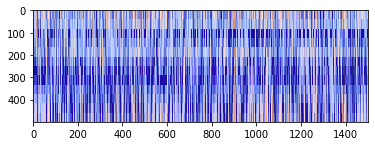

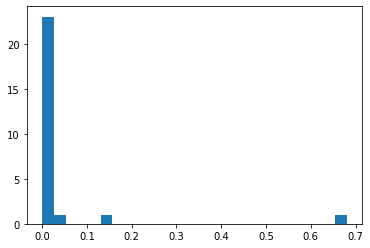

------------------------------------------------------------------------------------------
Image : a0003.jpg


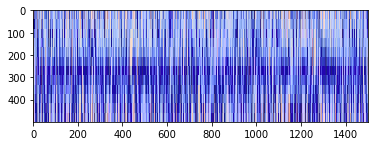

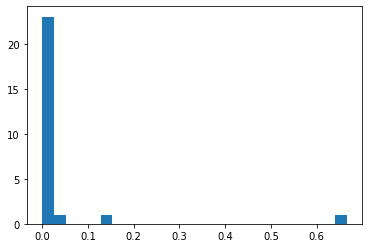

------------------------------------------------------------------------------------------
Image : a0002.jpg


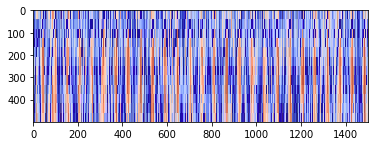

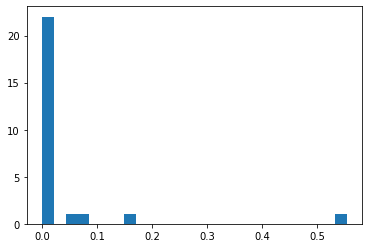

------------------------------------------------------------------------------------------
Image : a0005.jpg


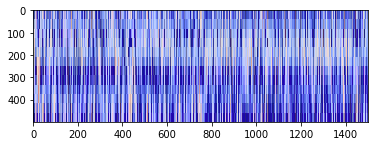

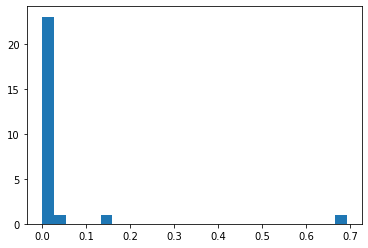

------------------------------------------------------------------------------------------
Image : a0004.jpg


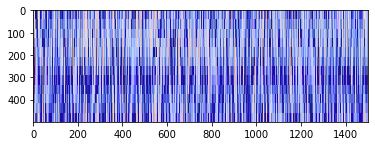

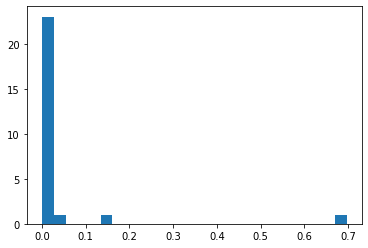

------------------------------------------------------------------------------------------


In [222]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from imutils import paths
import cv2
import os

desc = LocalBinaryPatterns(3)
df  = pd.DataFrame(columns=['image_name']+[i for i in range(0,26)])
pd.merge(df['image_name'],df)
data = []
images_name = []
folder = 'Images/'
for i in range(0,len(os.listdir('Images/'))):
    img = os.listdir('Images/')[i]
    #print(img)
    image = cv2.imread('Images/'+img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = desc.describe(gray)
    data.append(hist)
    df = df.append(data, ignore_index=True)
    images_name.append(img)
    
    print("Image : "+img)
    plt.imshow(image) 
    plt.show() 
    
    plt.hist(data,bins=26)
    plt.show()
    print("-"*90)
    
    data.clear()

df['image_name'] = images_name

In [223]:
df

,image_name,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
0,a0001.jpg,0.008427,0.023360,0.004363,0.001892,0.000773,0.000708,0.000255,0.001055,0.000624,...,0.000824,0.013936,0.000729,0.014852,0.001248,0.012849,0.004519,0.021633,0.135028,0.679891
1,a0003.jpg,0.008771,0.022776,0.005755,0.002293,0.000944,0.000749,0.000311,0.000997,0.000648,...,0.000845,0.014415,0.000640,0.015633,0.001197,0.015189,0.005787,0.022583,0.147423,0.665012
2,a0002.jpg,0.008824,0.014032,0.012753,0.003036,0.001517,0.001147,0.000544,0.001488,0.001692,...,0.001691,0.014211,0.001227,0.019883,0.001757,0.011853,0.010133,0.019860,0.162613,0.552761
3,a0005.jpg,0.008635,0.024005,0.004321,0.001807,0.000761,0.000563,0.000220,0.001019,0.000440,...,0.000831,0.013301,0.000619,0.015288,0.001064,0.014696,0.004203,0.022800,0.138113,0.691905
4,a0004.jpg,0.008883,0.023529,0.003883,0.001828,0.000672,0.000697,0.000237,0.001065,0.000533,...,0.000824,0.013465,0.000597,0.015107,0.001096,0.012764,0.003643,0.022337,0.134980,0.696455


In [224]:
df.to_csv("images.csv")